In [103]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [104]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [105]:
data_26 = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [106]:
data_70 = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

### EU Seasonal Average of DIC

In [107]:
data_26 = data_26.where(data_26)
data_70 = data_70.where(data_70)

In [108]:
sliced_frame_26 = data_26.sel(time_counter=slice('2090', '2100'))

In [109]:
sliced_frame_70 = data_70.sel(time_counter=slice('2090', '2100'))

In [110]:
data_26_plot = data_26.DIC.mean(dim=('y', 'x', 'deptht'))
data_70_plot = data_70.DIC.mean(dim=('y', 'x', 'deptht'))

In [111]:
data_26_plot = data_26_plot.to_dataset()
data_70_plot = data_70_plot.to_dataset()

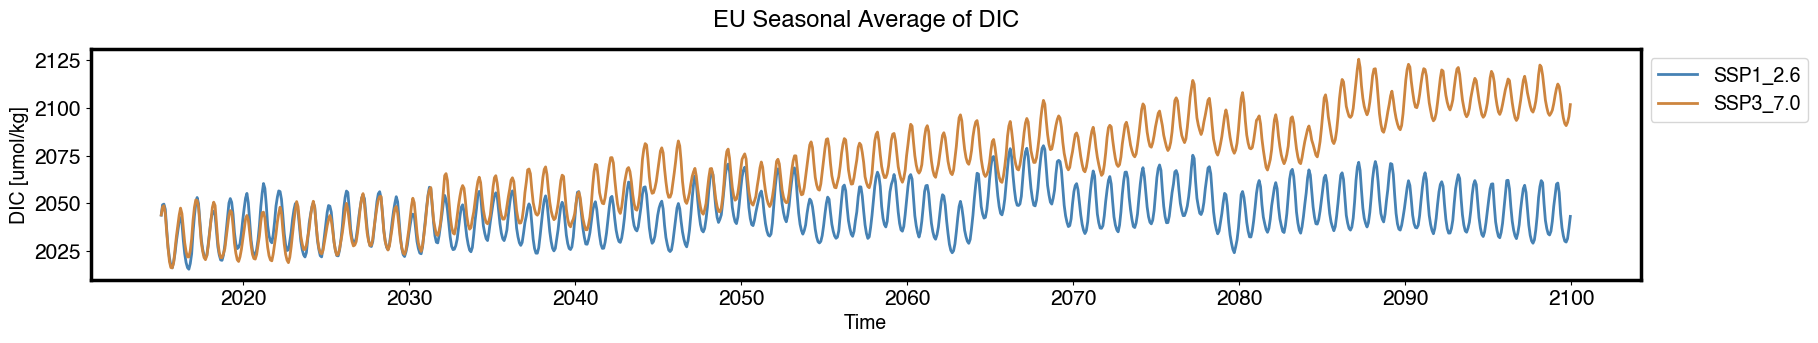

In [112]:
plt.figure(figsize=(20, 3))
plt.plot(data_26_plot.time_counter, data_26_plot.DIC, linewidth=2, label = 'SSP1_2.6', color="steelblue")
plt.plot(data_70_plot.time_counter, data_70_plot.DIC, linewidth=2, label = 'SSP3_7.0', color="peru")
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [113]:
sliced_frame_26_plot = sliced_frame_26.DIC.mean(dim=('y', 'x', 'deptht'))
sliced_frame_70_plot = sliced_frame_70.DIC.mean(dim=('y', 'x', 'deptht'))

In [114]:
sliced_frame_26_plot = sliced_frame_26_plot.to_dataset()
sliced_frame_70_plot = sliced_frame_70_plot.to_dataset()

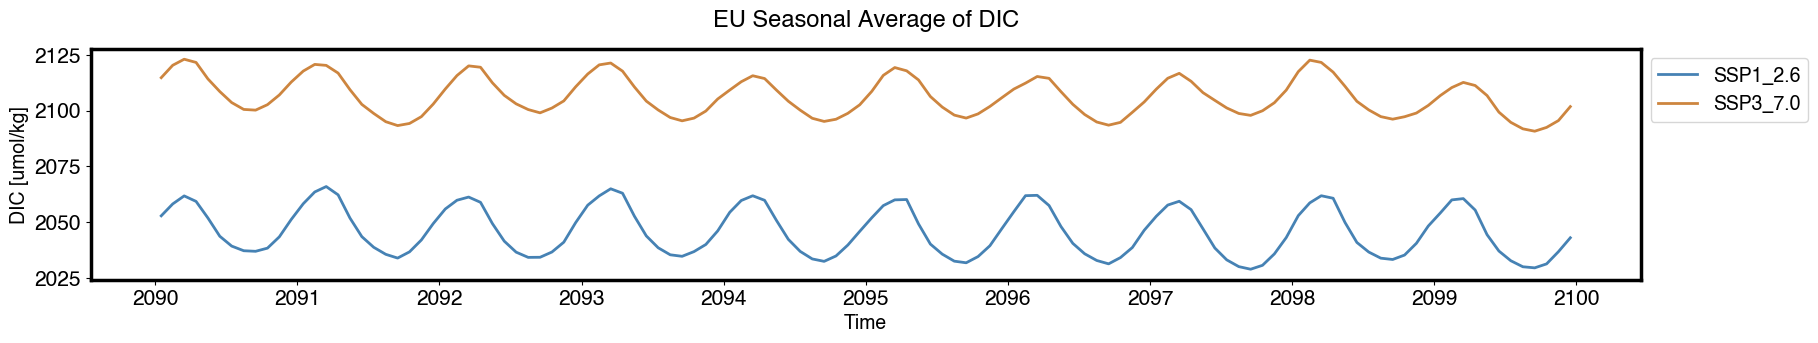

In [115]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_26_plot.time_counter, sliced_frame_26_plot.DIC, linewidth=2, label = 'SSP1_2.6', color="steelblue")
plt.plot(sliced_frame_70_plot.time_counter, sliced_frame_70_plot.DIC, linewidth=2, label = 'SSP3_7.0', color="peru")
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of DIC

In [116]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_26 = data_26["DIC"].sel(time_counter=slice(start_date, end_date))

In [117]:
dic_season_summary_26 = dic_26.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_26 = dic_26.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_26 = dic_season_mean_all_years_26.groupby('time_counter').mean(["y", "x", "deptht"])

In [118]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_70 = data_70["DIC"].sel(time_counter=slice(start_date, end_date))

In [119]:
dic_season_summary_70 = dic_70.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_70 = dic_70.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_70 = dic_season_mean_all_years_70.groupby('time_counter').mean(["y", "x", "deptht"])

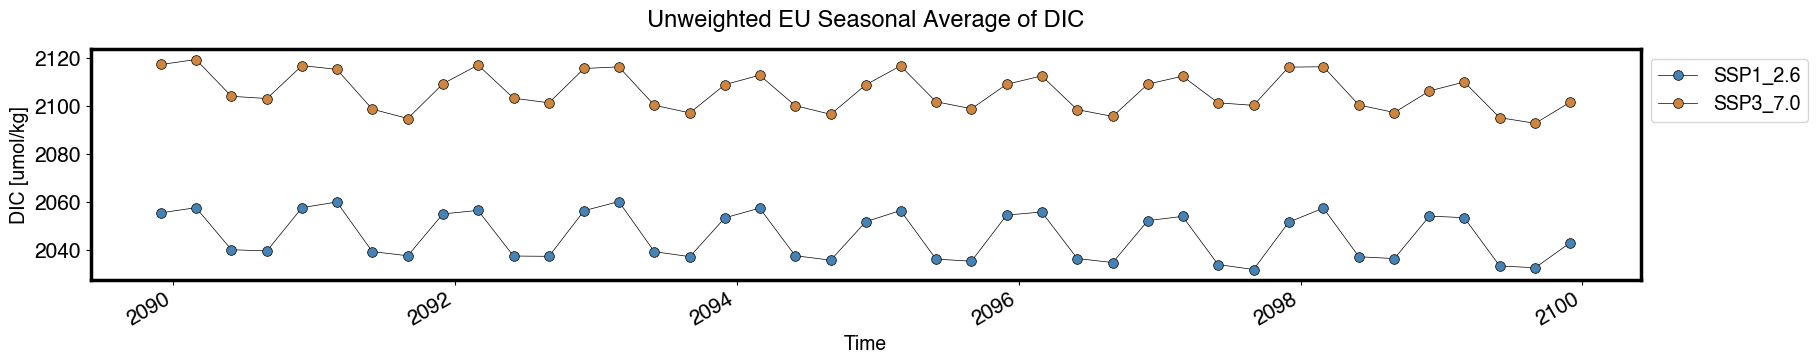

In [120]:
f, ax = plt.subplots(figsize=(20, 3))

dic_seasonal_mean_26.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="steelblue", 
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

dic_seasonal_mean_70.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC

In [121]:
month_length_26 = dic_26.time_counter.dt.days_in_month
dic_weighted_mean_26 = ((dic_26 * month_length_26).resample(time_counter='QS-DEC').sum() / month_length_26.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_26 = dic_weighted_mean_26.where(dic_weighted_mean_26)
dic_weighted_season_26 = dic_weighted_mean_26.groupby('time_counter').mean(["y", "x", "deptht"])

In [122]:
month_length_70 = dic_70.time_counter.dt.days_in_month
dic_weighted_mean_70 = ((dic_70 * month_length_70).resample(time_counter='QS-DEC').sum() / month_length_70.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_70 = dic_weighted_mean_70.where(dic_weighted_mean_70)
dic_weighted_season_70 = dic_weighted_mean_70.groupby('time_counter').mean(["y", "x", "deptht"])

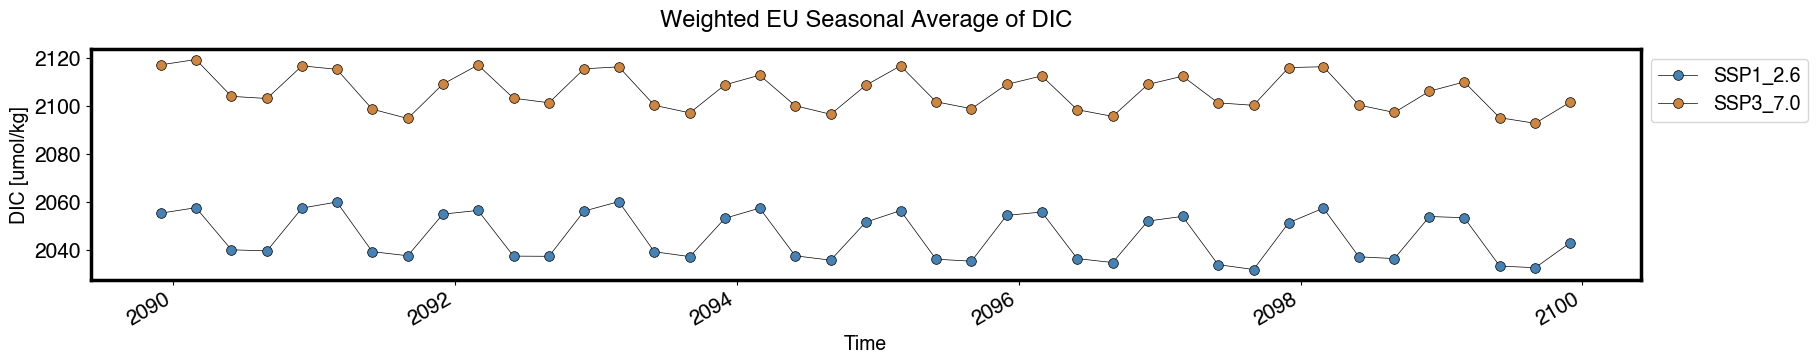

In [123]:
colors = {3: "peru", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
dic_weighted_season_26.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="steelblue",
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

dic_weighted_season_70.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC (seasons displayed)

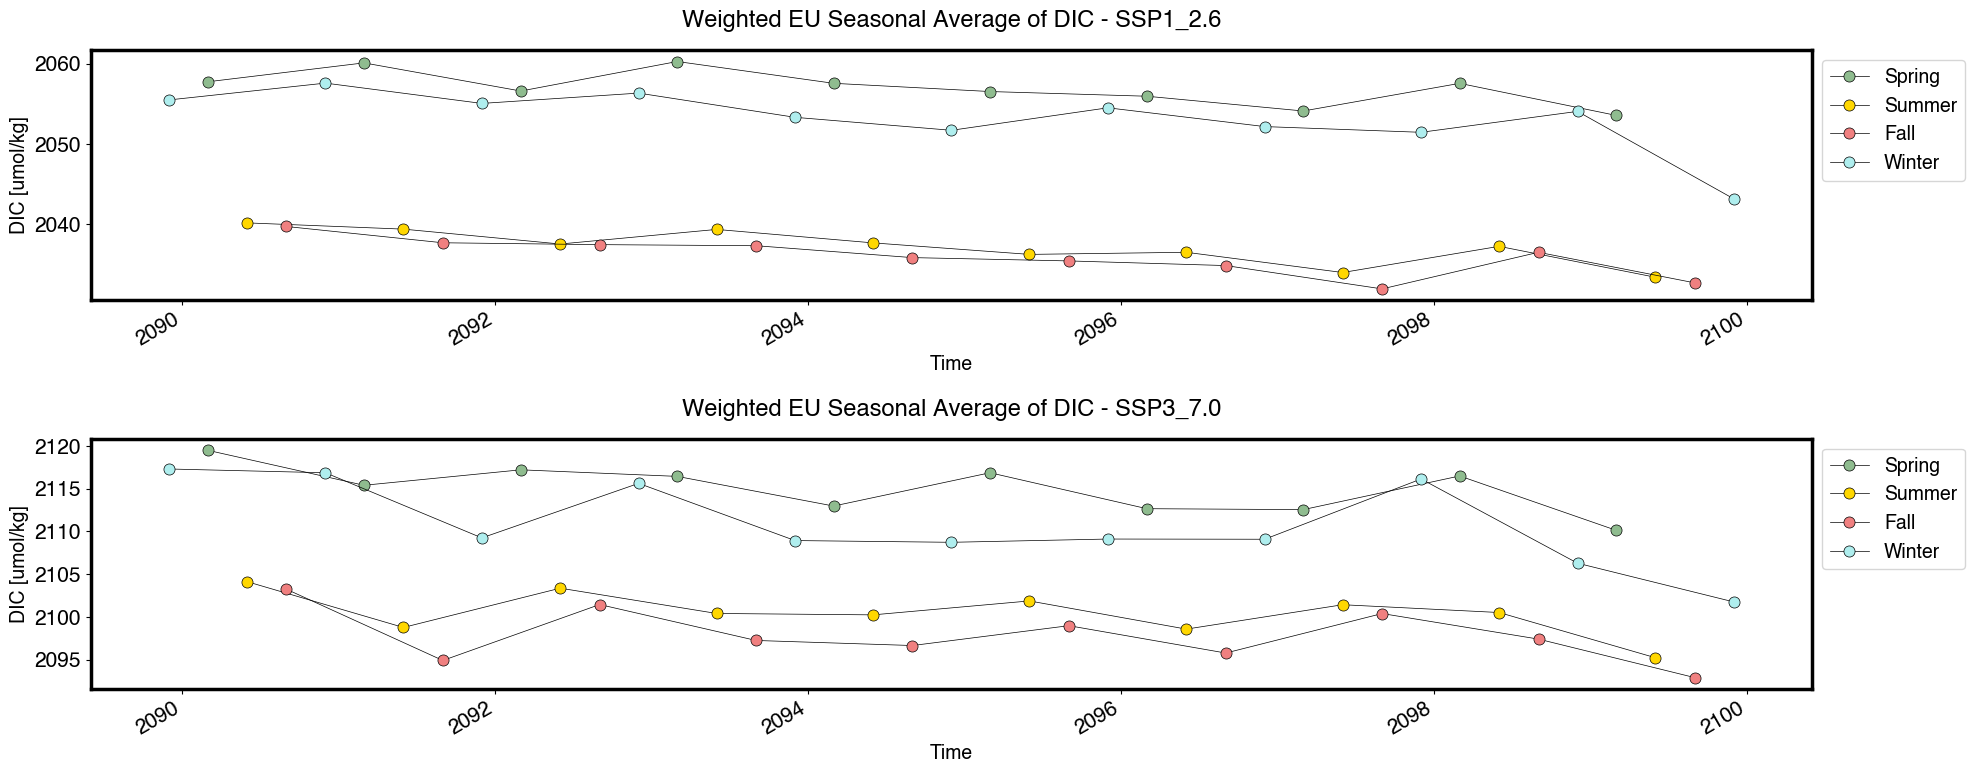

In [124]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in dic_weighted_season_26.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of DIC - SSP1_2.6", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC [umol/kg]', fontsize=14)

for month, arr in dic_weighted_season_70.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of DIC - SSP3_7.0", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC [umol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of DIC - SSP1_2.6 (seasons displayed)

In [125]:
dic_weighted_26 = dic_weighted_season_26.to_dataframe('dic')
dic_weighted_26['Month'] = pd.DatetimeIndex(dic_weighted_26.index).month

In [126]:
conditions = [
    (dic_weighted_26['Month'] == 3),
    (dic_weighted_26['Month'] == 6),
    (dic_weighted_26['Month'] == 9),
    (dic_weighted_26['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_26['Month'] = np.select(conditions, values)

In [127]:
colors = dict(zip(dic_weighted_26.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

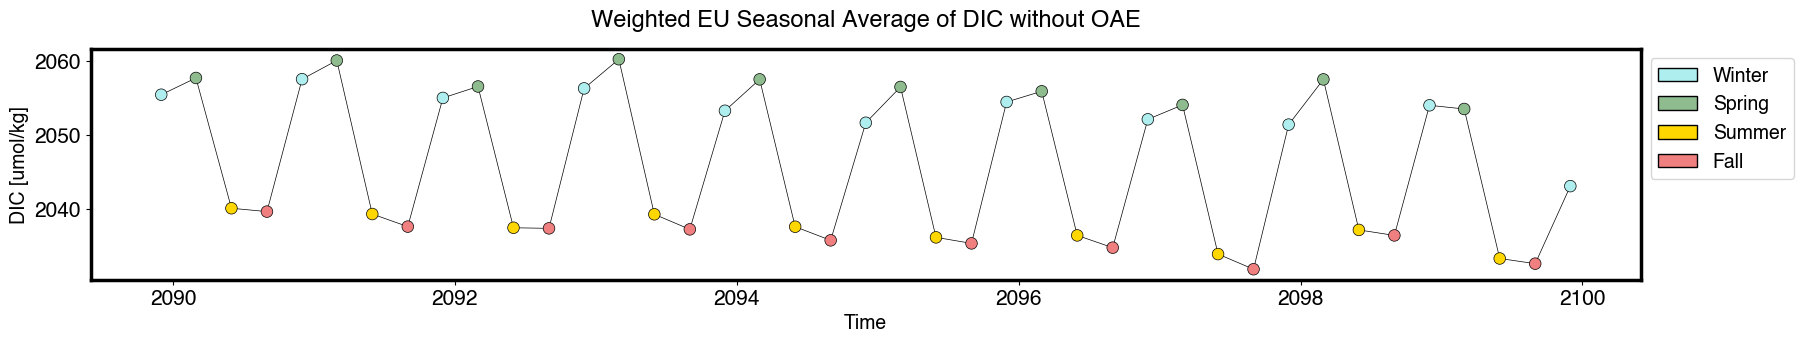

In [128]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_26.index, dic_weighted_26.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_26.index, dic_weighted_26.dic, color=dic_weighted_26.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC - SSP3_7.0 (seasons displayed)

In [129]:
dic_weighted_70 = dic_weighted_season_70.to_dataframe('dic')
dic_weighted_70['Month'] = pd.DatetimeIndex(dic_weighted_70.index).month

In [130]:
conditions = [
    (dic_weighted_70['Month'] == 3),
    (dic_weighted_70['Month'] == 6),
    (dic_weighted_70['Month'] == 9),
    (dic_weighted_70['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_70['Month'] = np.select(conditions, values)

In [131]:
colors = dict(zip(dic_weighted_70.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

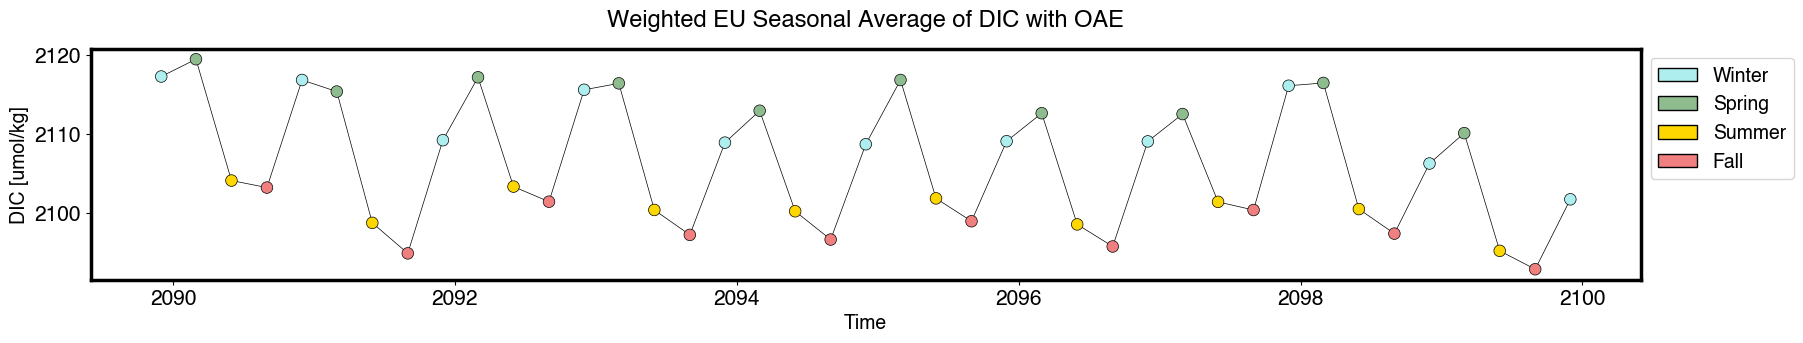

In [132]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_70.index, dic_weighted_70.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_70.index, dic_weighted_70.dic, color=dic_weighted_70.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC (seasons displayed)

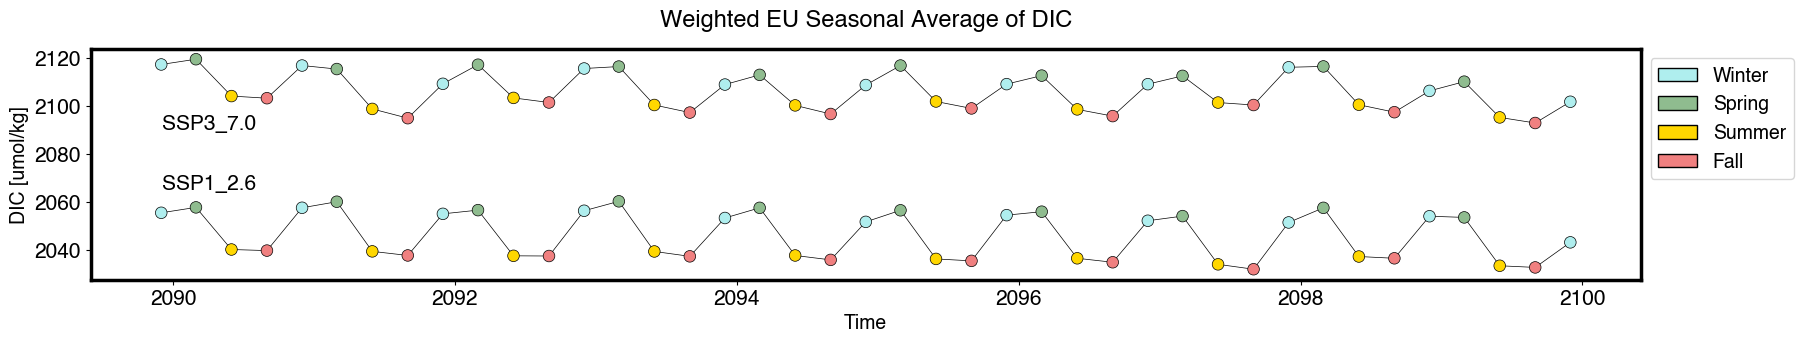

In [133]:
colors = dict(zip(dic_weighted_26.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_weighted_26.index, dic_weighted_26.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2090, s='SSP3_7.0')
ax.scatter(dic_weighted_26.index, dic_weighted_26.dic, color=dic_weighted_26.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(dic_weighted_70.index, dic_weighted_70.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2065, s='SSP1_2.6')
ax.scatter(dic_weighted_70.index, dic_weighted_70.dic, color=dic_weighted_70.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

#plt.savefig('EUDIC_seasonal_mean.png')

pass

### EU Monthly Averaged dic for the last 10 years

In [134]:
mean_26 = (sliced_frame_26.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_26 = mean_26.groupby(mean_26.index.month).DIC.mean()
mean_26 = mean_26.reset_index()
mean_26['time_counter'] = mean_26['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_26 = mean_26.set_index('time_counter')

In [135]:
mean_70 = (sliced_frame_70.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_70 = mean_70.groupby(mean_70.index.month).DIC.mean()
mean_70 = mean_70.reset_index()
mean_70['time_counter']= mean_70['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_70 = mean_70.set_index('time_counter')

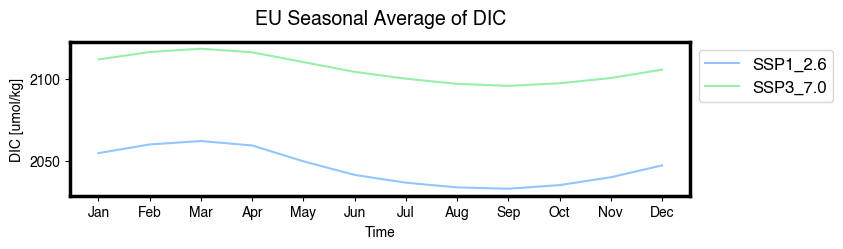

In [136]:
plt.figure(figsize=(8,2))
plt.plot(mean_26.DIC, label='SSP1_2.6')
plt.plot(mean_70.DIC, label='SSP3_7.0')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("DIC [umol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### Map of EU Seasonal Average of DIC - SSP1_2.6

In [137]:
sliced_frame_26 = sliced_frame_26.DIC.mean(dim=('deptht'))

In [138]:
month_length = sliced_frame_26.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_26 = (sliced_frame_26 * weights).groupby("time_counter.season").sum(dim="time_counter")

In [139]:
ds_unweighted_26 = sliced_frame_26.groupby("time_counter.season").mean("time_counter")
ds_diff_26 = ds_weighted_26 - ds_unweighted_26

In [140]:
ds_weighted_26 = ds_weighted_26.to_dataset(name='dic')
ds_unweighted_26 = ds_unweighted_26.to_dataset(name='dic')
ds_diff_26 = ds_diff_26.to_dataset(name='dic')

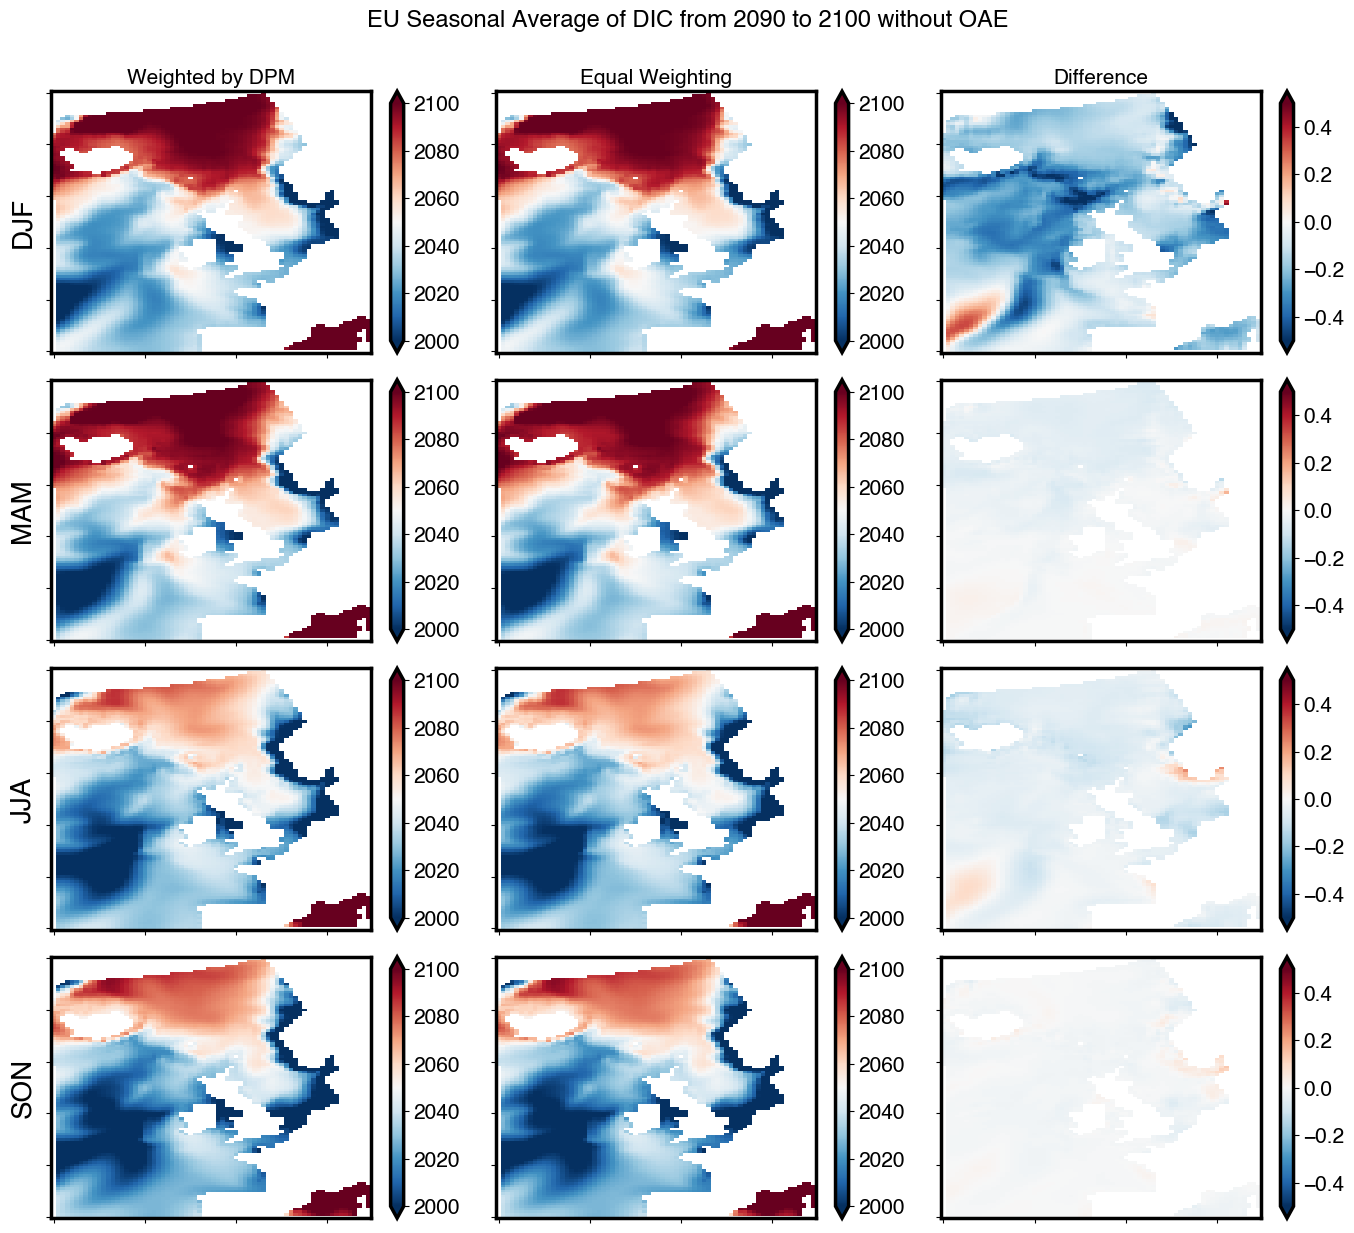

In [141]:
notnull = pd.notnull(ds_unweighted_26["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_26["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_26["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_26["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of DIC - SSP3_7.0

In [142]:
sliced_frame_70 = sliced_frame_70.DIC.mean(dim=('deptht'))

In [143]:
month_length = sliced_frame_70.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_70 = (sliced_frame_70 * weights).groupby("time_counter.season").sum(dim="time_counter")

In [144]:
ds_unweighted_70 = sliced_frame_70.groupby("time_counter.season").mean("time_counter")
ds_diff_70 = ds_weighted_70 - ds_unweighted_70

In [145]:
ds_weighted_70 = ds_weighted_70.to_dataset(name='dic')
ds_unweighted_70 = ds_unweighted_70.to_dataset(name='dic')
ds_diff_70 = ds_diff_70.to_dataset(name='dic')

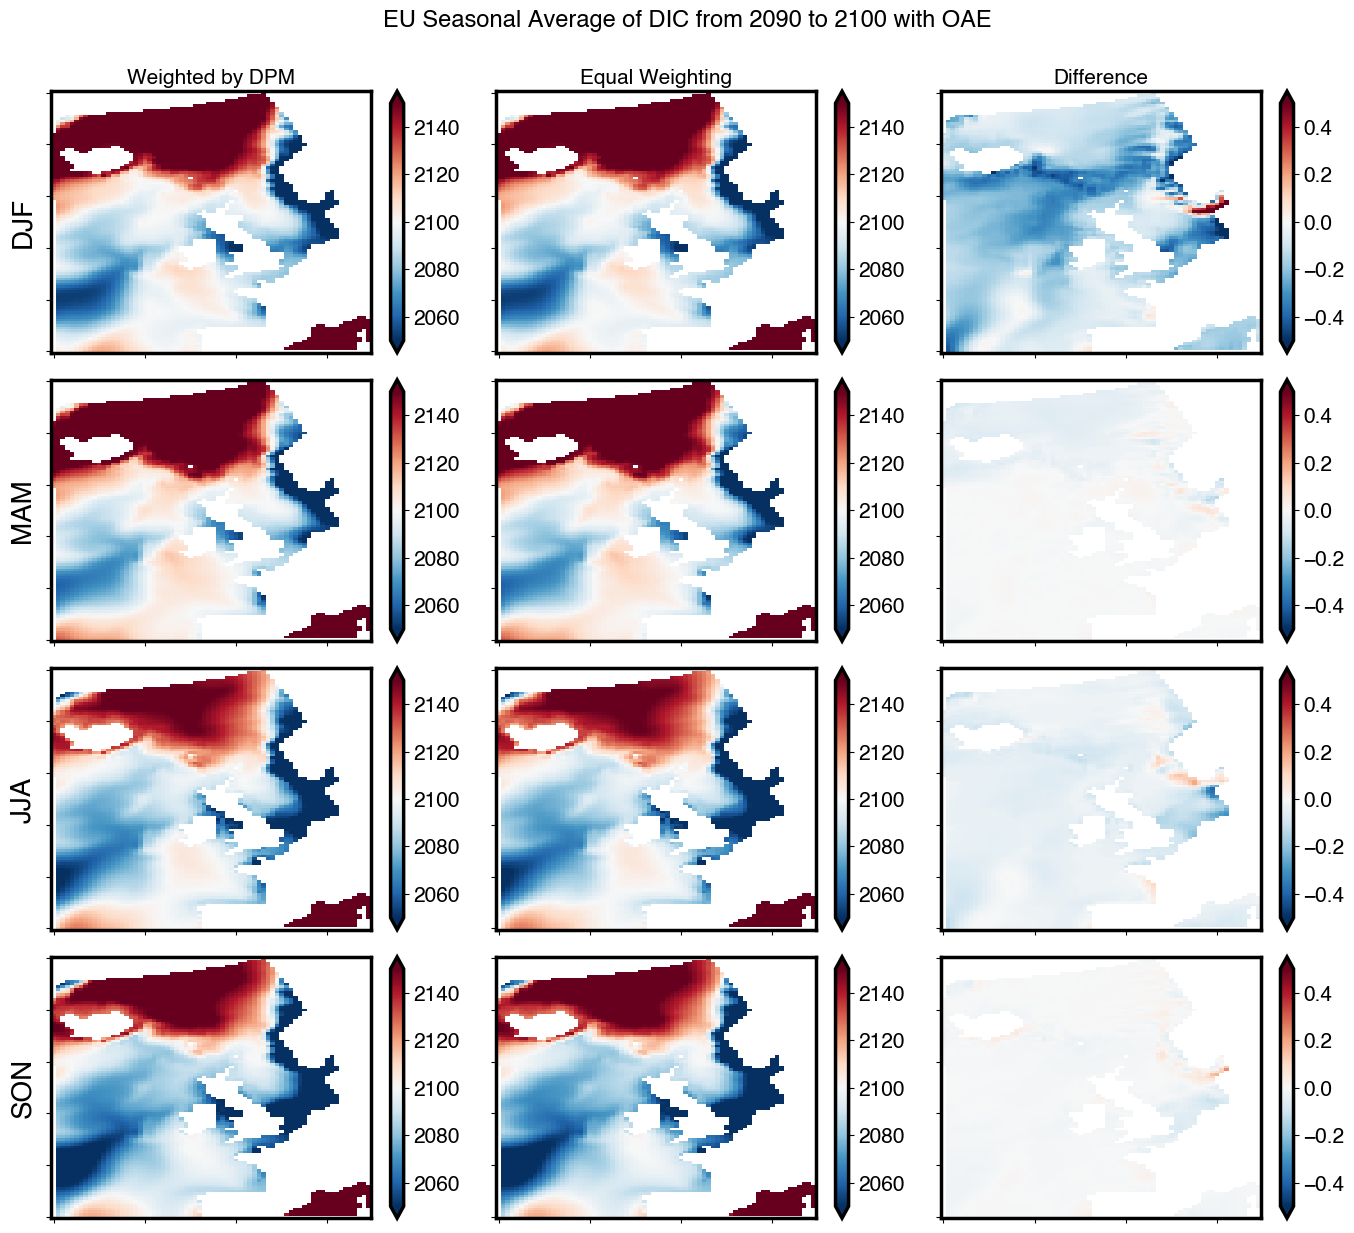

In [146]:
notnull = pd.notnull(ds_unweighted_26["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_70["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_70["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_70["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of DIC

In [147]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

dic_26_month = data_26["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_26 = dic_26_month.groupby('time_counter').mean(["y", "x", "deptht"])

In [148]:
dic_70_month = data_70["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_70 = dic_70_month.groupby('time_counter').mean(["y", "x", "deptht"])

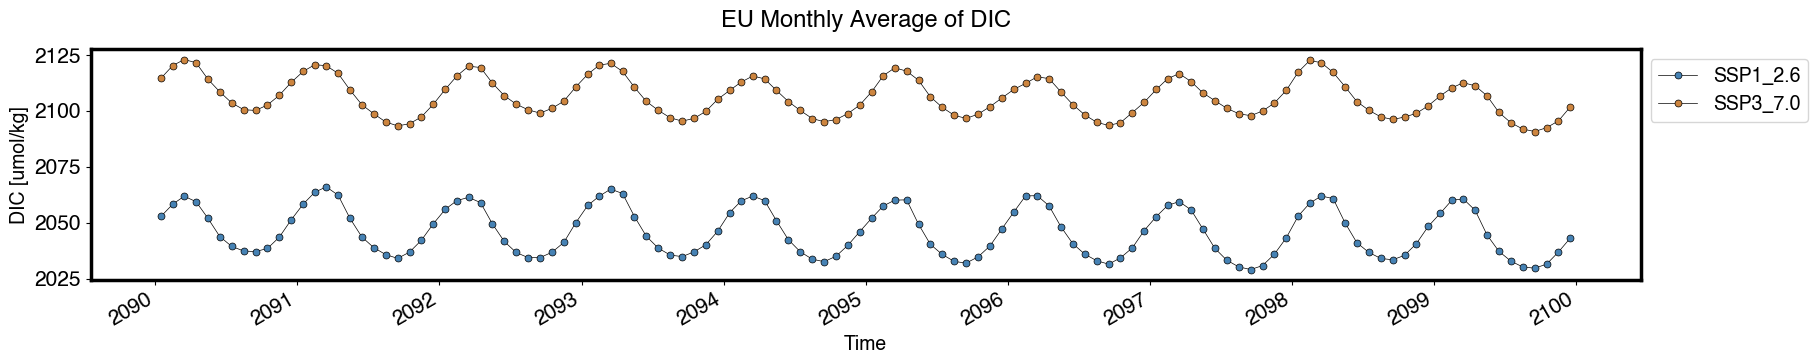

In [149]:
f, ax = plt.subplots(figsize=(20, 3))

dic_monthly_mean_26.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="steelblue", 
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

dic_monthly_mean_70.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("EU Monthly Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of DIC - SSP1_2.6

In [150]:
dic_26_monthly = dic_monthly_mean_26.to_dataframe('dic')
dic_26_monthly['Month'] = pd.DatetimeIndex(dic_26_monthly.index).month

In [151]:
conditions = [
    (dic_26_monthly['Month'] == 1),
    (dic_26_monthly['Month'] == 2),
    (dic_26_monthly['Month'] == 3),
    (dic_26_monthly['Month'] == 4),
    (dic_26_monthly['Month'] == 5),
    (dic_26_monthly['Month'] == 6),
    (dic_26_monthly['Month'] == 7),
    (dic_26_monthly['Month'] == 8),
    (dic_26_monthly['Month'] == 9),
    (dic_26_monthly['Month'] == 10),
    (dic_26_monthly['Month'] == 11),
    (dic_26_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_26_monthly['Month'] = np.select(conditions, values)

In [152]:
colors = dict(zip(dic_26_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

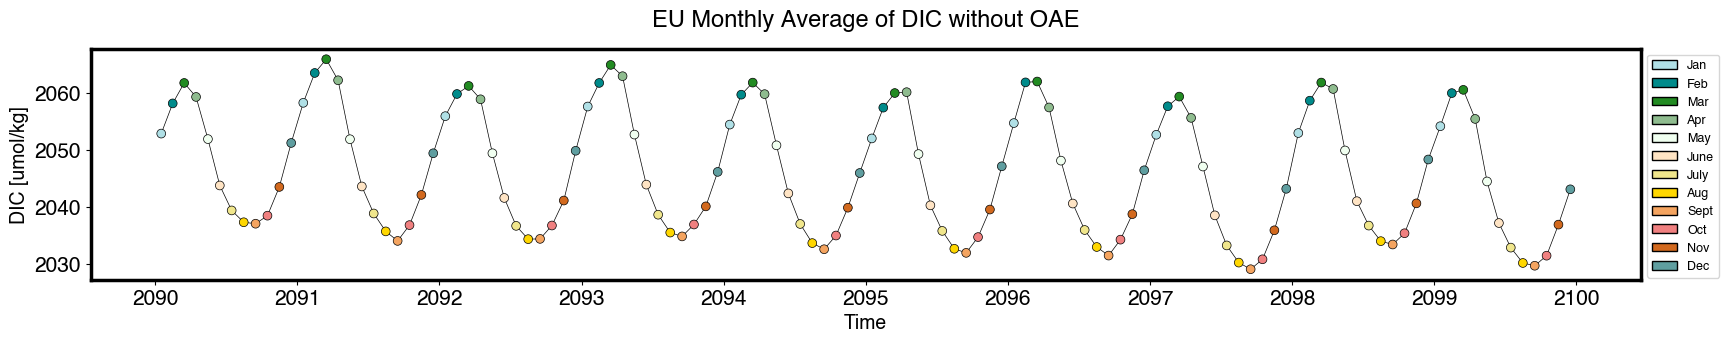

In [153]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_26_monthly.index, dic_26_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_26_monthly.index, dic_26_monthly.dic, color=dic_26_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC - SSP3_7.0

In [154]:
dic_70_monthly = dic_monthly_mean_70.to_dataframe('dic')
dic_70_monthly['Month'] = pd.DatetimeIndex(dic_70_monthly.index).month

In [155]:
conditions = [
    (dic_70_monthly['Month'] == 1),
    (dic_70_monthly['Month'] == 2),
    (dic_70_monthly['Month'] == 3),
    (dic_70_monthly['Month'] == 4),
    (dic_70_monthly['Month'] == 5),
    (dic_70_monthly['Month'] == 6),
    (dic_70_monthly['Month'] == 7),
    (dic_70_monthly['Month'] == 8),
    (dic_70_monthly['Month'] == 9),
    (dic_70_monthly['Month'] == 10),
    (dic_70_monthly['Month'] == 11),
    (dic_70_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_70_monthly['Month'] = np.select(conditions, values)

In [156]:
colors = dict(zip(dic_70_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

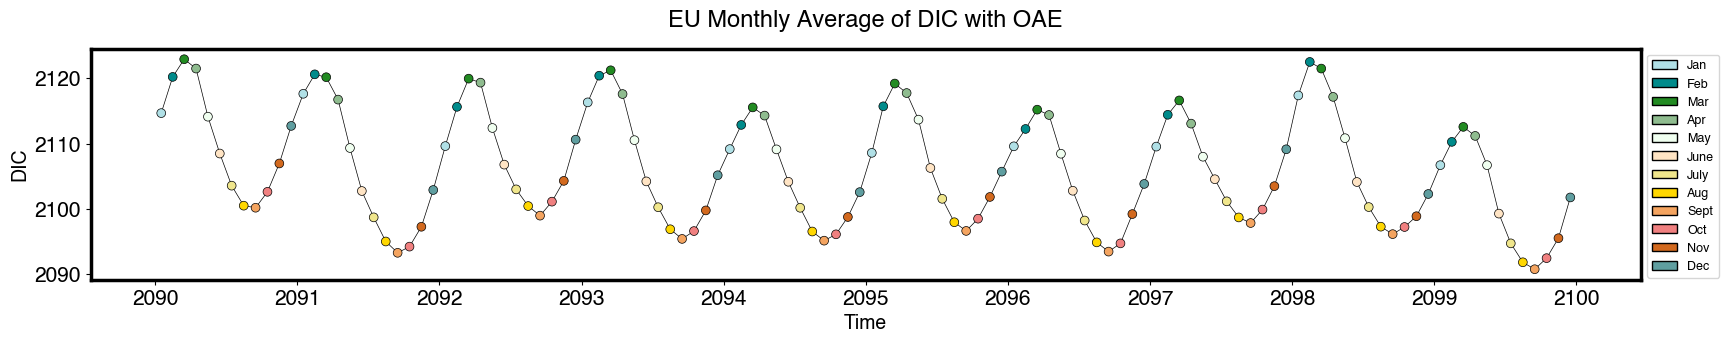

In [157]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_70_monthly.index, dic_70_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_70_monthly.index, dic_70_monthly.dic, color=dic_70_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("EU Monthly Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC

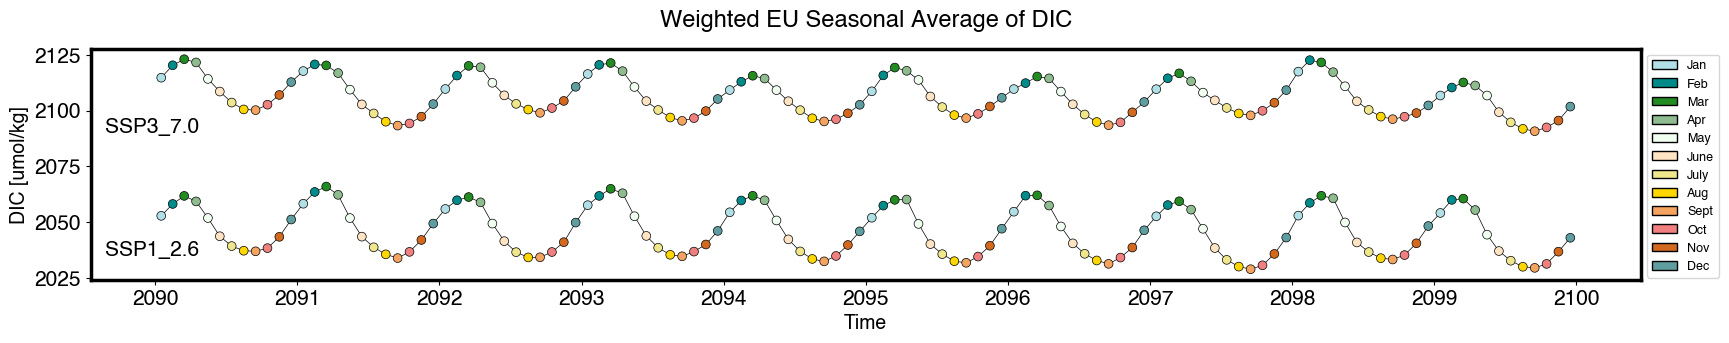

In [158]:
colors = dict(zip(dic_26_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_26_monthly.index, dic_26_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2090, s='SSP3_7.0')
ax.scatter(dic_26_monthly.index, dic_26_monthly.dic, color=dic_26_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(dic_70_monthly.index, dic_70_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2035, s='SSP1_2.6')
ax.scatter(dic_70_monthly.index, dic_70_monthly.dic, color=dic_70_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

#plt.savefig('EUDIC_monthly_mean.png')

pass

### Δ DIC between SSP1_2.6 and SSP3_7.0

In [159]:
delta_dic = dic_70_monthly.dic - dic_26_monthly.dic

In [160]:
delta_dic = delta_dic.to_xarray()

In [161]:
delta_dic = delta_dic.to_dataframe('dic')
delta_dic['Month'] = pd.DatetimeIndex(delta_dic.index).month

In [162]:
conditions = [
    (delta_dic['Month'] == 1),
    (delta_dic['Month'] == 2),
    (delta_dic['Month'] == 3),
    (delta_dic['Month'] == 4),
    (delta_dic['Month'] == 5),
    (delta_dic['Month'] == 6),
    (delta_dic['Month'] == 7),
    (delta_dic['Month'] == 8),
    (delta_dic['Month'] == 9),
    (delta_dic['Month'] == 10),
    (delta_dic['Month'] == 11),
    (delta_dic['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_dic['Month'] = np.select(conditions, values)

In [163]:
colors = dict(zip(delta_dic.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

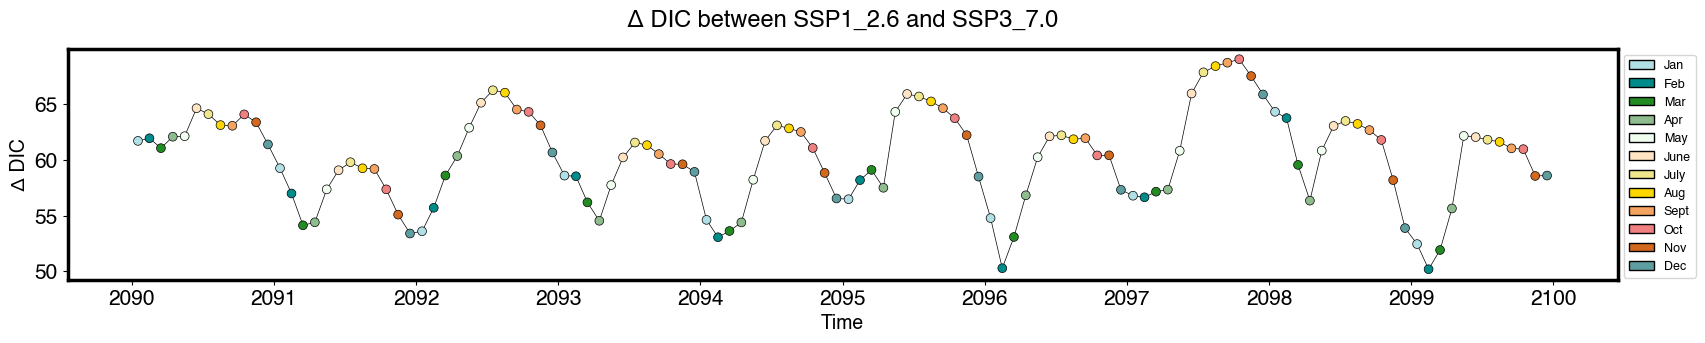

In [102]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_dic.index, delta_dic.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC', fontsize=14)
ax.set_title("Δ DIC between SSP1_2.6 and SSP3_7.0", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('EUDIC_Δ.png')

pass